In [35]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math
%matplotlib inline
warnings.filterwarnings('ignore')

In [22]:
def plotdistribution(filename):
    with open(filename) as handle:
        distdict = json.loads(handle.read())
    
    newdict = {k: v[0] for k, v in distdict.items()}
    df = pd.DataFrame.from_dict(newdict, orient = 'index')
    df = df.reset_index()
    df = df.sort_values(by = 'index', ascending = True)
        
    return df.plot(kind = 'bar', x = 'index', y = 0, figsize = [10,7])

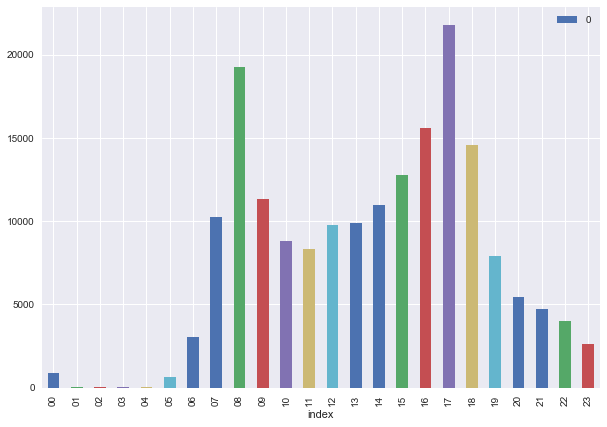

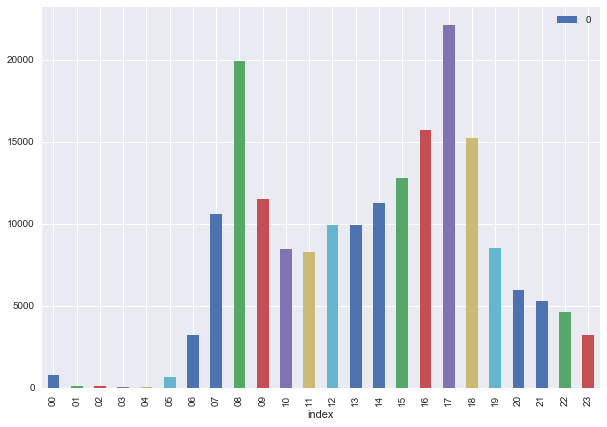

In [34]:
plotdistribution('../Data/dicts/o_ma.json')
plotdistribution('../Data/dicts/o_di.json')

In [57]:
def cossim(vec1,vec2):
        sum11, sum12, sum22 = 0, 0, 0
        for i in range(len(vec1)):
            x = vec1[i]; y = vec2[i]
            sum11 += x*x
            sum22 += y*y
            sum12 += x*y
        return sum12/math.sqrt(sum11*sum22)

In [60]:
def cosine_similarity(filename1, filename2):
    with open(filename1) as handle:
        distdict1 = json.loads(handle.read())
    
    with open(filename2) as handle:
        distdict2 = json.loads(handle.read())
        
    newdict1 = {k: v[0] for k, v in distdict1.items()}
    df1 = pd.DataFrame.from_dict(newdict1, orient = 'index')
    df1 = df1.reset_index()
    df1 = df1.sort_values(by = 'index', ascending = True)
    
    newdict2 = {k: v[0] for k, v in distdict2.items()}
    df2 = pd.DataFrame.from_dict(newdict2, orient = 'index')
    df2 = df2.reset_index()
    df2 = df2.sort_values(by = 'index', ascending = True)
    
    return cossim(df1[0].tolist(), df2[0].tolist())

In [86]:
cosine_similarity('../Data/dicts/o_za.json', '../Data/dicts/o_zo.json')

0.9940344408383943